In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
jayaantanaath_student_habits_vs_academic_performance_path = kagglehub.dataset_download('jayaantanaath/student-habits-vs-academic-performance')

print('Data source import complete.')


Data source import complete.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv")

In [5]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [7]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [8]:
df.shape

(1000, 16)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [11]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [12]:
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])

In [13]:
df.isnull().values.any()

np.False_

In [14]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


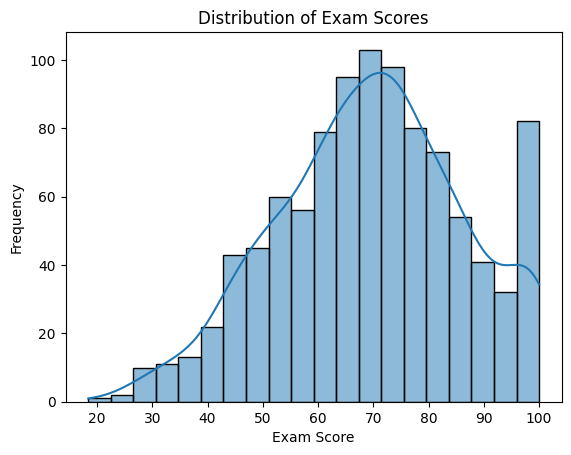

In [15]:
sns.histplot(df['exam_score'], kde=True, bins=20)
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()

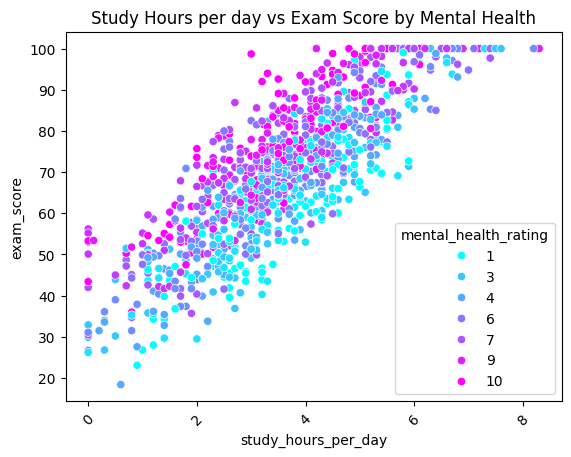

In [16]:
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', hue='mental_health_rating', palette='cool')
plt.title('Study Hours per day vs Exam Score by Mental Health')
plt.xticks(rotation=45)
plt.show()

In [17]:
cat_col = df.select_dtypes(include='object').columns
cat_col = [col for col in cat_col]
cat_col.remove('student_id')
cat_col

['gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation']

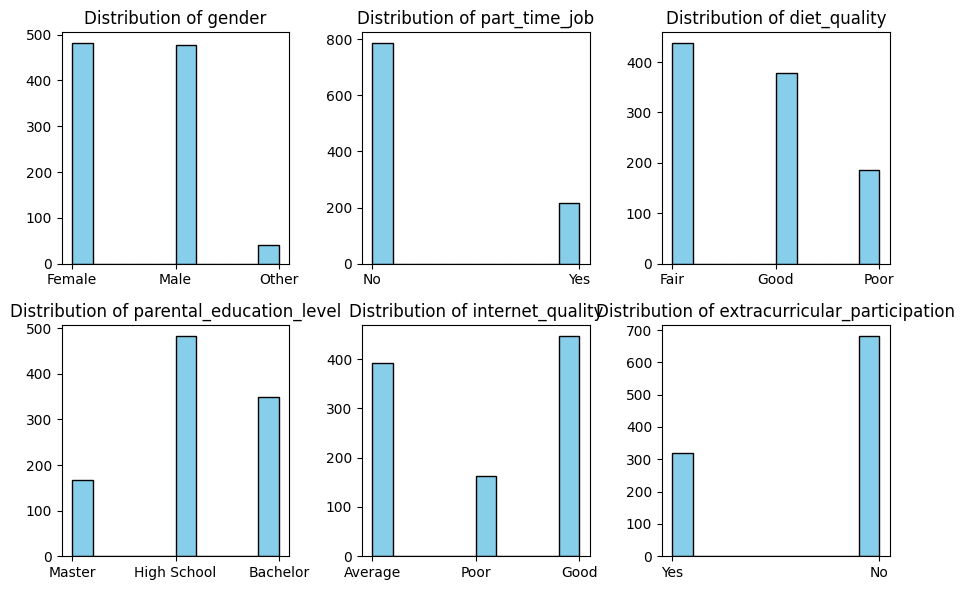

In [18]:
plt.figure(figsize=(9,6))
for i in range(6):
    plt.subplot(2, 3, i+1)  # subplot index starts at 1
    plt.hist(df[cat_col[i]], color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {cat_col[i]}')

plt.tight_layout()
plt.show()

In [19]:
num_col = df.select_dtypes(exclude='object').columns
num_col = [col for col in num_col]
num_col

['age',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'attendance_percentage',
 'sleep_hours',
 'exercise_frequency',
 'mental_health_rating',
 'exam_score']

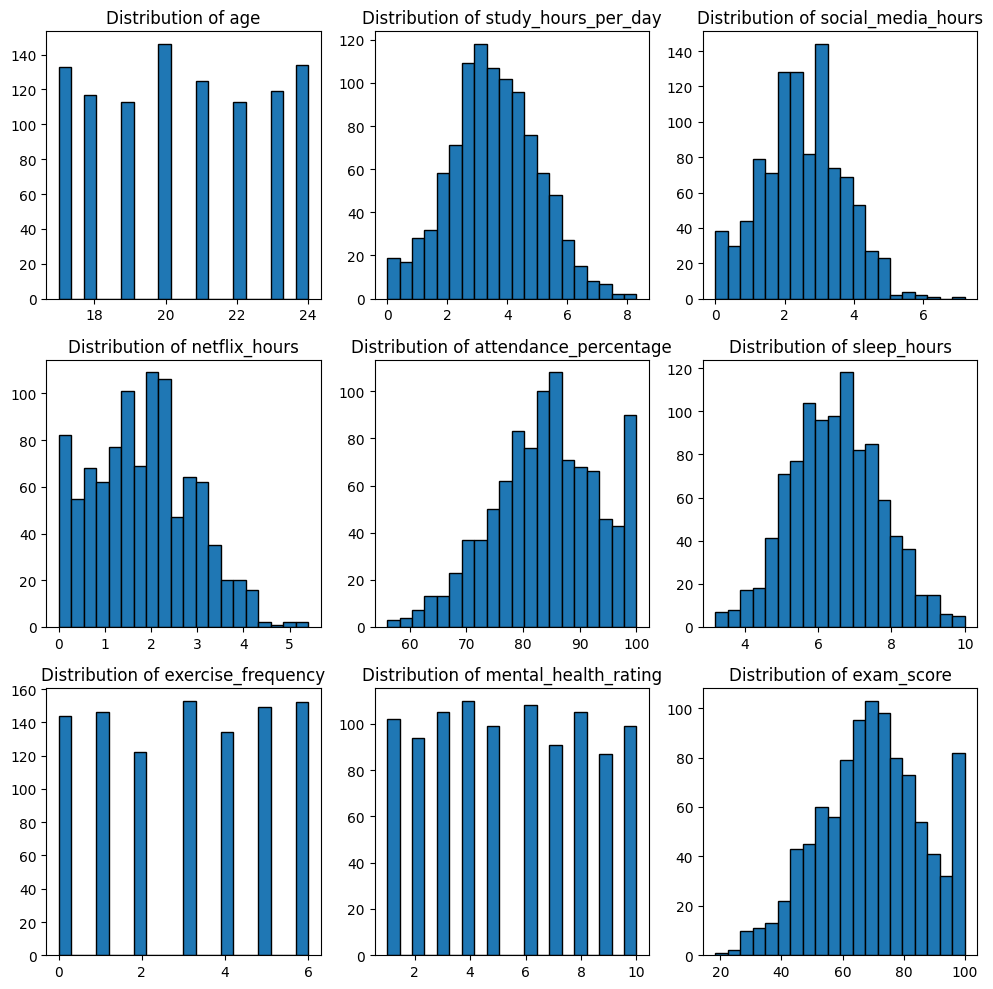

In [20]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i+1)  # subplot index starts at 1
    plt.hist(df[num_col[i]],bins=20, edgecolor='black')
    plt.title(f'Distribution of {num_col[i]}')

plt.tight_layout()
plt.show()

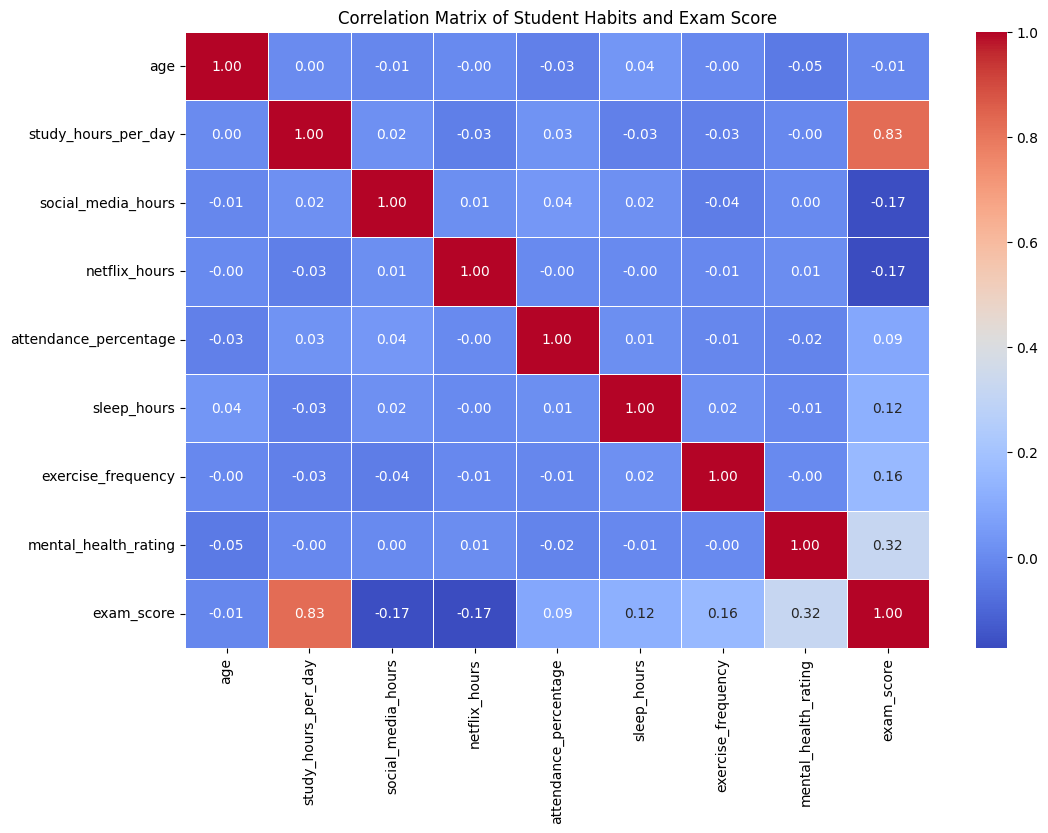

In [21]:
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Student Habits and Exam Score")
plt.show()

In [22]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [23]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,0,23,0,0.0,1.2,1.1,0,85.0,8.0,0,6,2,0,8,1,56.2
1,1,20,0,6.9,2.8,2.3,0,97.3,4.6,1,6,1,0,8,0,100.0
2,2,21,1,1.4,3.1,1.3,0,94.8,8.0,2,1,1,2,1,0,34.3
3,3,23,0,1.0,3.9,1.0,0,71.0,9.2,2,4,2,1,1,1,26.8
4,4,19,0,5.0,4.4,0.5,0,90.9,4.9,0,3,2,1,1,0,66.4


In [24]:
target_column = 'exam_score'
X = df.drop(target_column, axis=1)
y = df[target_column]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}
results = {
    'Model': [],
    'MSE': [],
    'R2': [],
    'Predicted': []
}


In [27]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R2'].append(r2)
    results['Predicted'].append(y_pred)

    print(f"{name} - MSE: {mse:.2f}, R²: {r2:.2f}")

Linear Regression - MSE: 26.55, R²: 0.90
Decision Tree - MSE: 95.22, R²: 0.63
Random Forest - MSE: 40.34, R²: 0.84


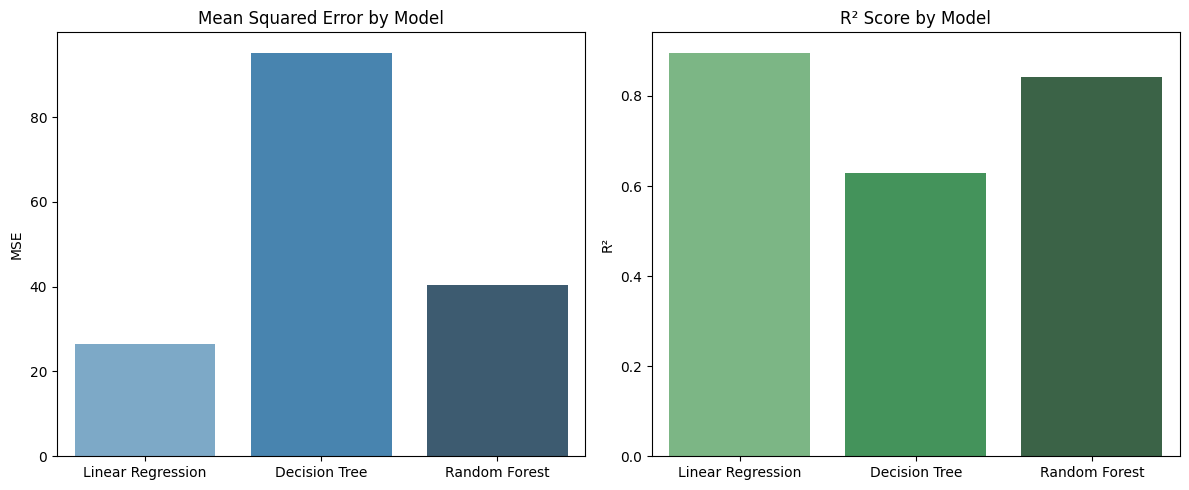

In [28]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=results['Model'], y=results['MSE'], palette='Blues_d')
plt.title('Mean Squared Error by Model')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
sns.barplot(x=results['Model'], y=results['R2'], palette='Greens_d')
plt.title('R² Score by Model')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

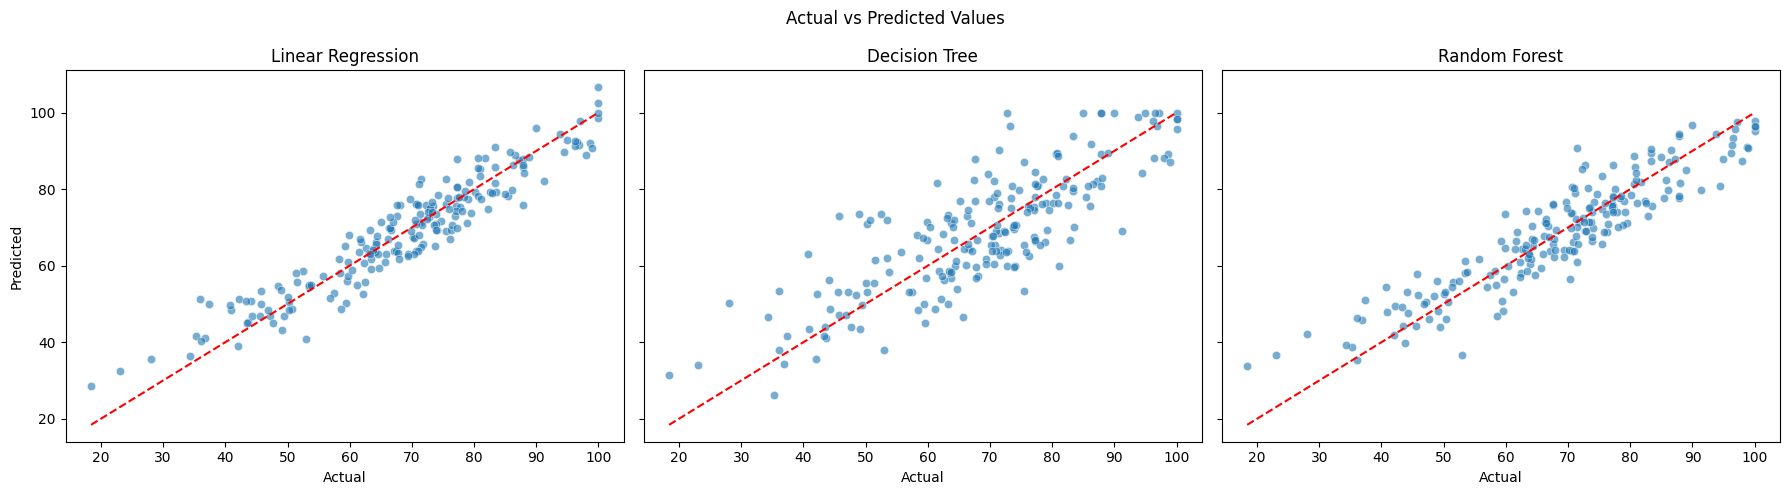

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, (name, y_pred) in enumerate(zip(results['Model'], results['Predicted'])):
    sns.scatterplot(x=y_test, y=y_pred, ax=axes[i], alpha=0.6)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('Actual')
    axes[i].set_ylabel('Predicted')

plt.suptitle("Actual vs Predicted Values")
plt.tight_layout()
plt.show()

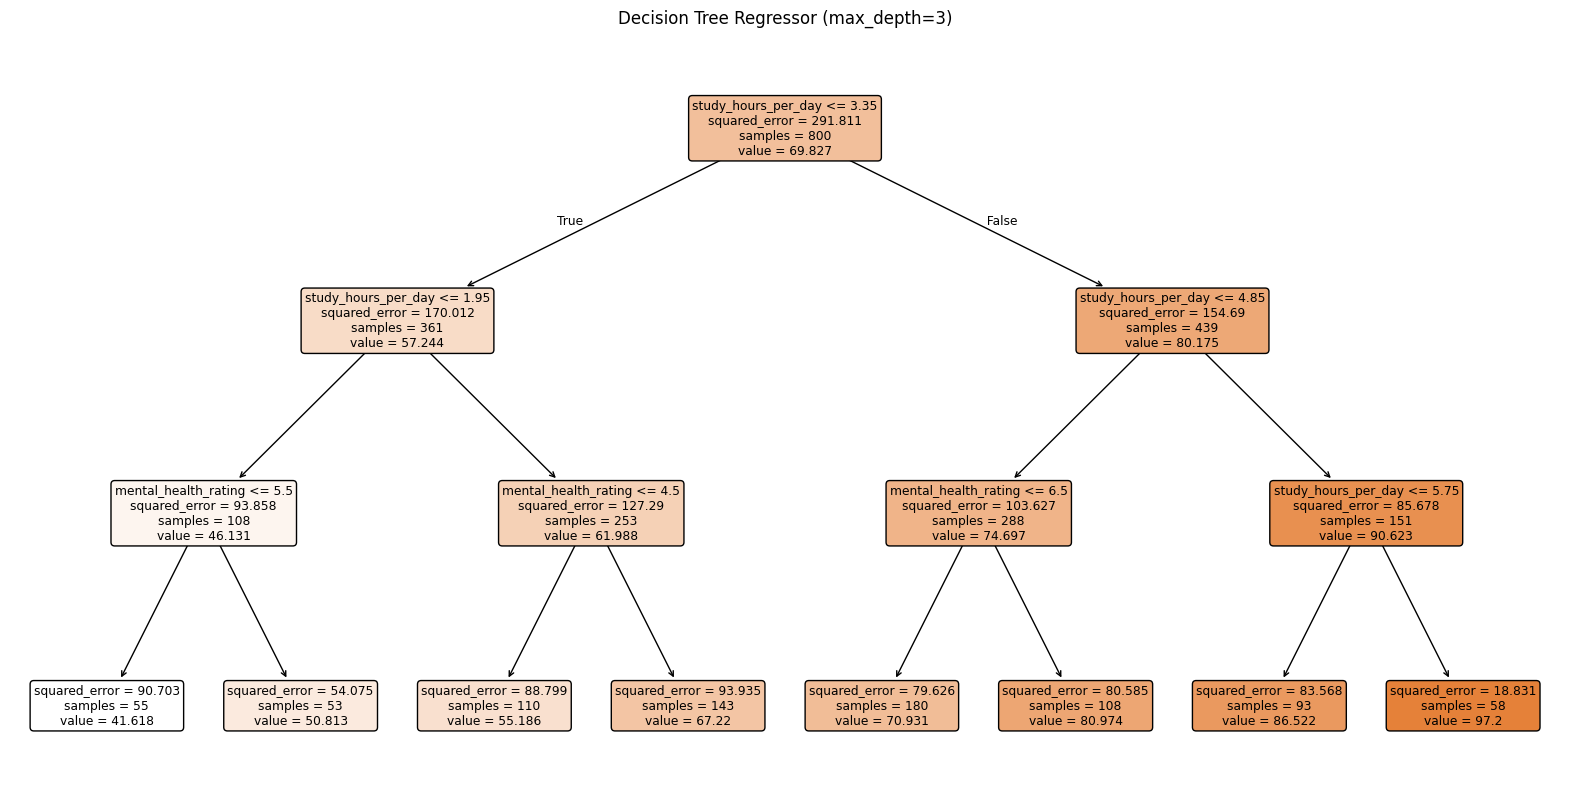

In [30]:
from sklearn.tree import plot_tree
dt_model = DecisionTreeRegressor(max_depth=3)
dt_model.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X_train.columns, filled=True, rounded=True)
plt.title("Decision Tree Regressor (max_depth=3)")
plt.show()

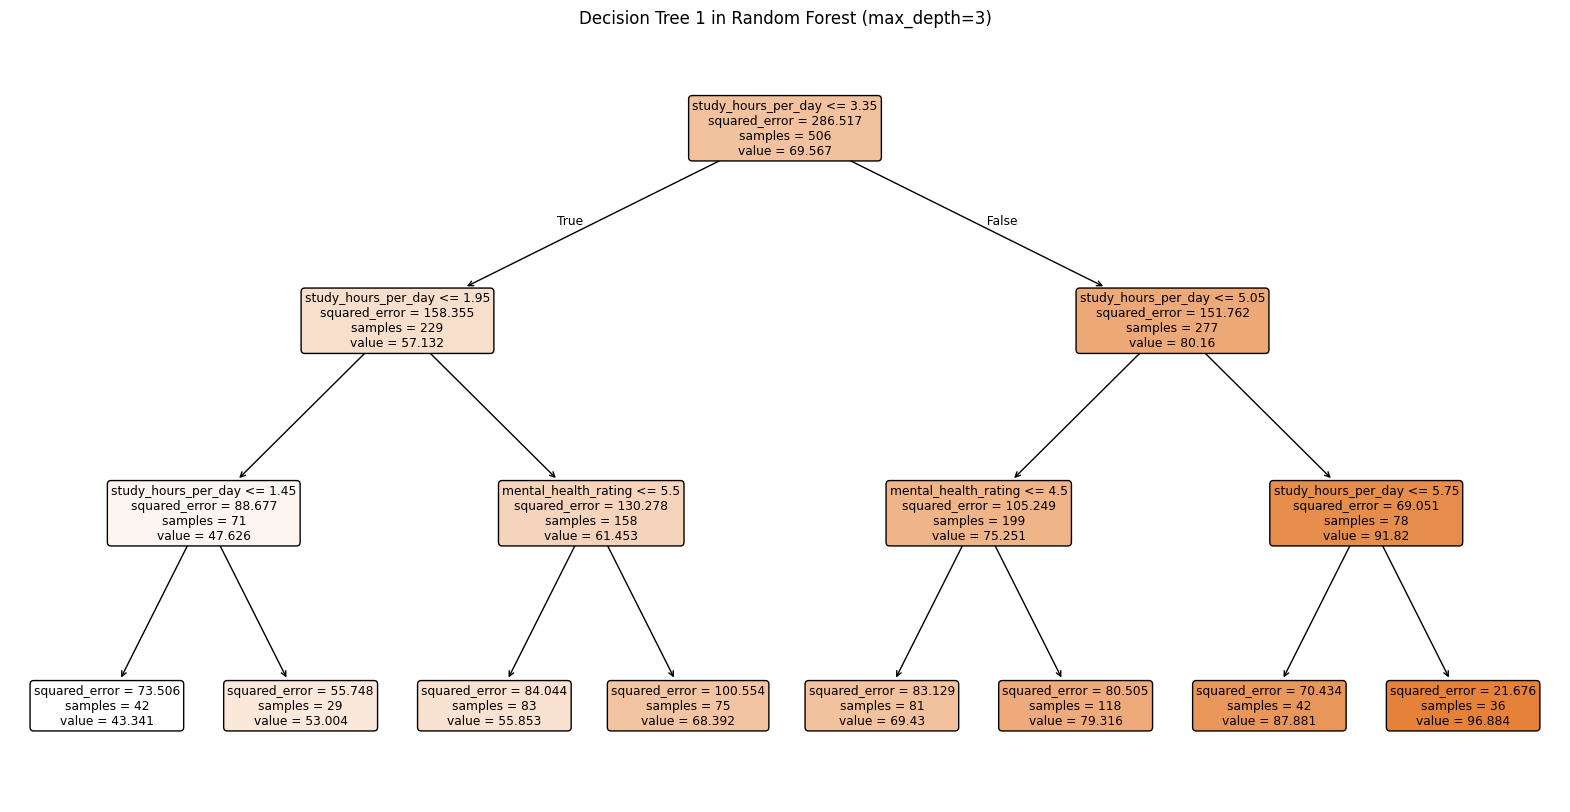

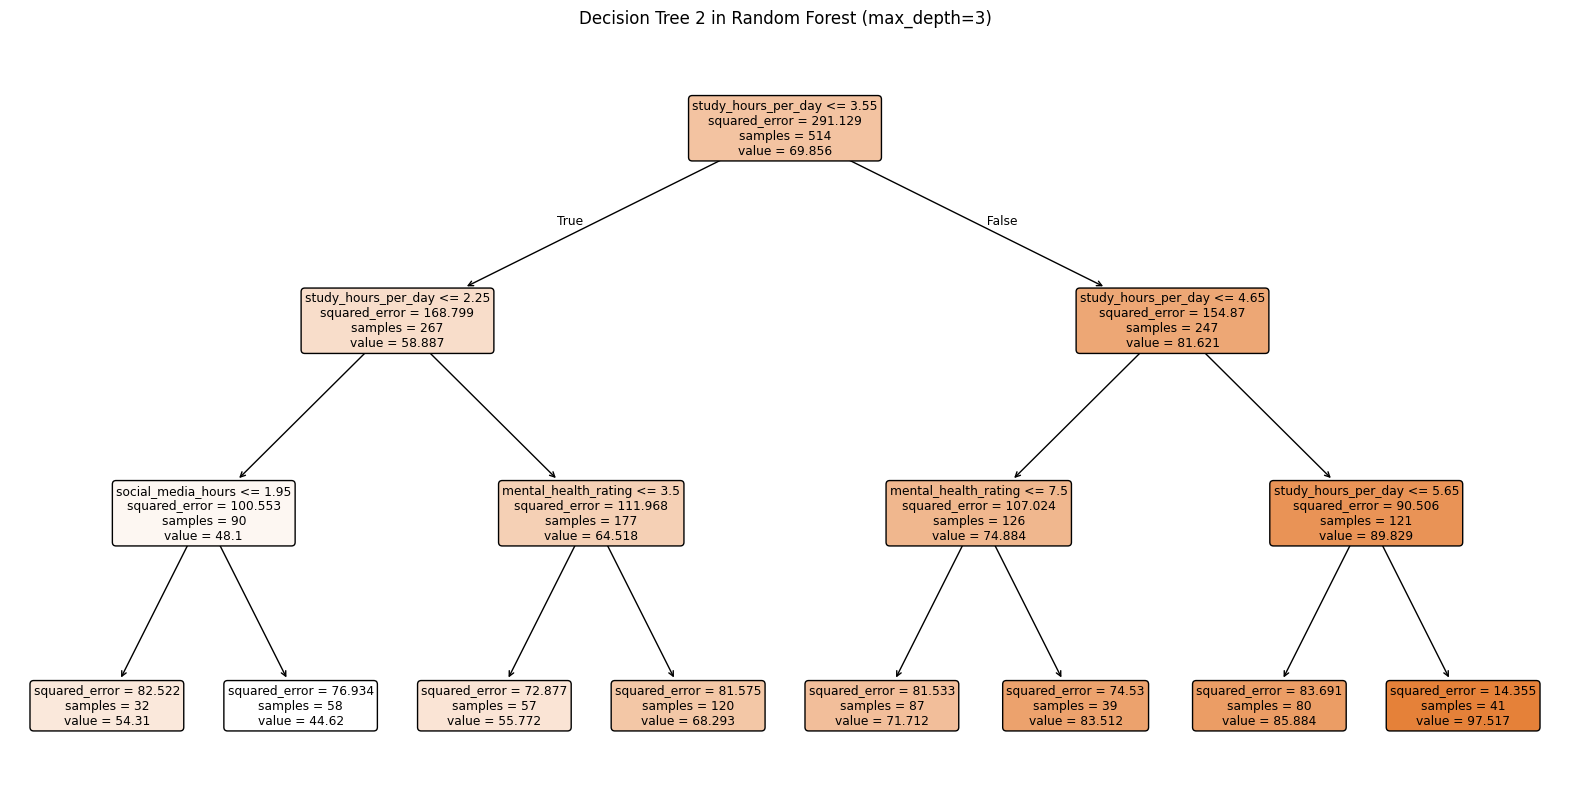

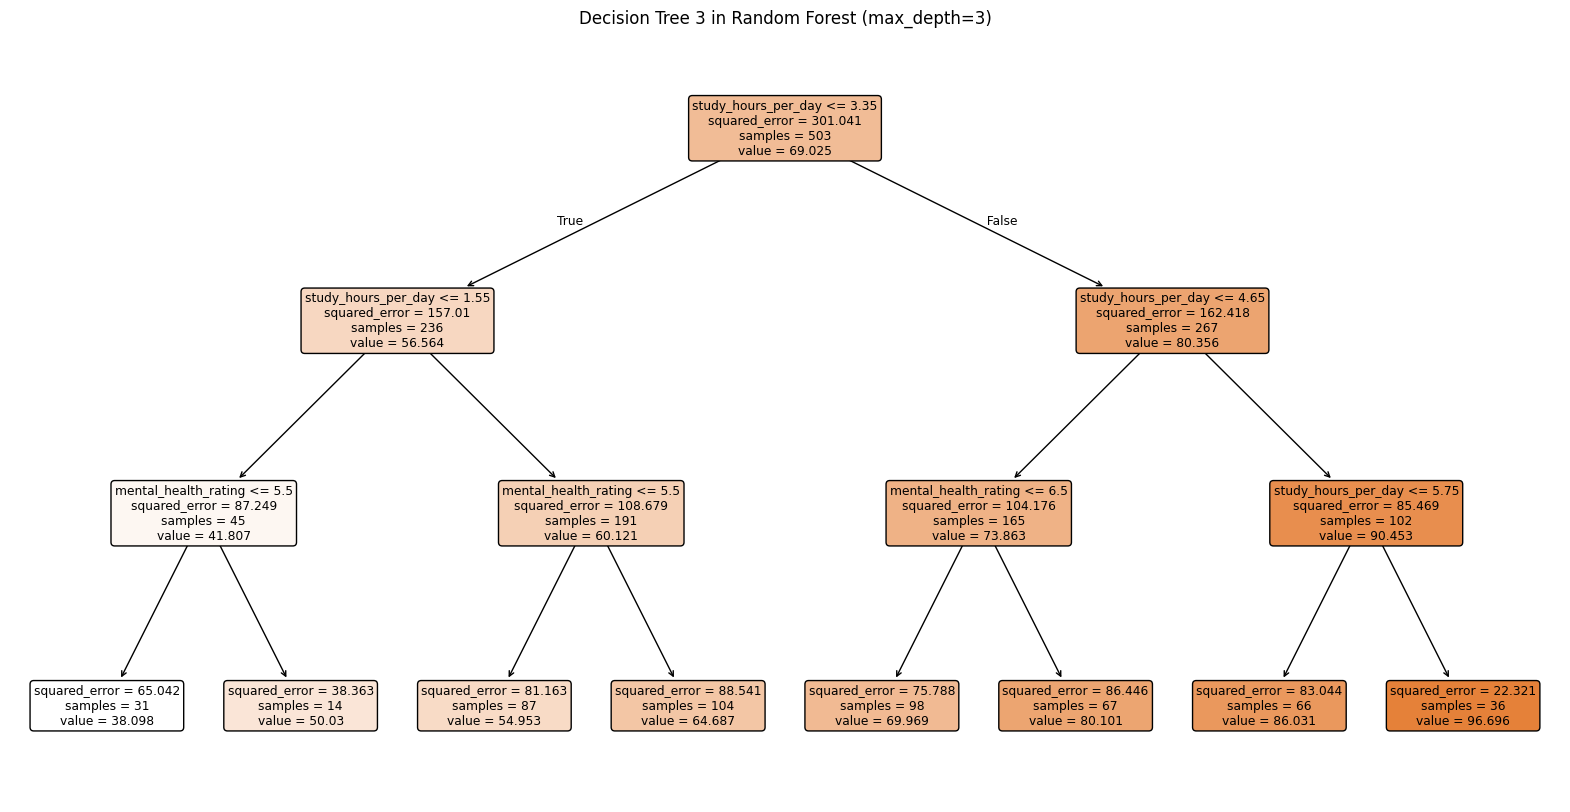

In [31]:
rf_model = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)

# Plot the first 3 trees
for i in range(3):
    estimator = rf_model.estimators_[i]
    plt.figure(figsize=(20, 10))
    plot_tree(estimator, feature_names=X_train.columns, filled=True, rounded=True)
    plt.title(f"Decision Tree {i+1} in Random Forest (max_depth=3)")
    plt.show()

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [33]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)
print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score (Negative):", grid_search.best_score_)

Best Parameters: {'ridge__alpha': 1}
Best MSE Score (Negative): -29.036635683426915


In [34]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X, y)
print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score (Negative):", grid_search.best_score_)

Best Parameters: {'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Best MSE Score (Negative): -42.03745703600001


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3010.7236 - mae: 44.7097 - val_loss: 490.9652 - val_mae: 18.2079
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 448.8939 - mae: 17.5913 - val_loss: 290.0438 - val_mae: 13.6885
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 299.1446 - mae: 14.1790 - val_loss: 305.4229 - val_mae: 14.1356
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 318.3307 - mae: 14.7770 - val_loss: 248.5385 - val_mae: 12.6248
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 267.2590 - mae: 13.3401 - val_loss: 227.5829 - val_mae: 12.2011
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 298.4443 - mae: 13.9225 - val_loss: 231.8787 - val_mae: 12.1986
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 300.3361 - mae: 14.2964 - val_loss: 213.3307 - val_mae: 11.8317
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 265.1044 - mae: 13.3721 - val_loss: 207.5828 - val_mae: 11.6815
Epoch 9/20
40/40 ━━━━━━

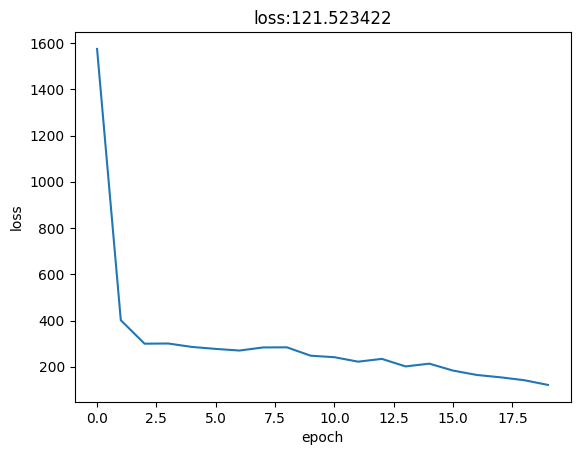

In [37]:
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [38]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
R² Score: 0.5707


In [39]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

y_pred = svr_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("SVR Regression Metrics:")
print(f"- MSE (Mean Squared Error): {mse:.2f}")
print(f"- MAE (Mean Absolute Error): {mae:.2f}")
print(f"- R² Score: {r2:.2f}")

SVR Regression Metrics:
- MSE (Mean Squared Error): 75.21
- MAE (Mean Absolute Error): 6.62
- R² Score: 0.71


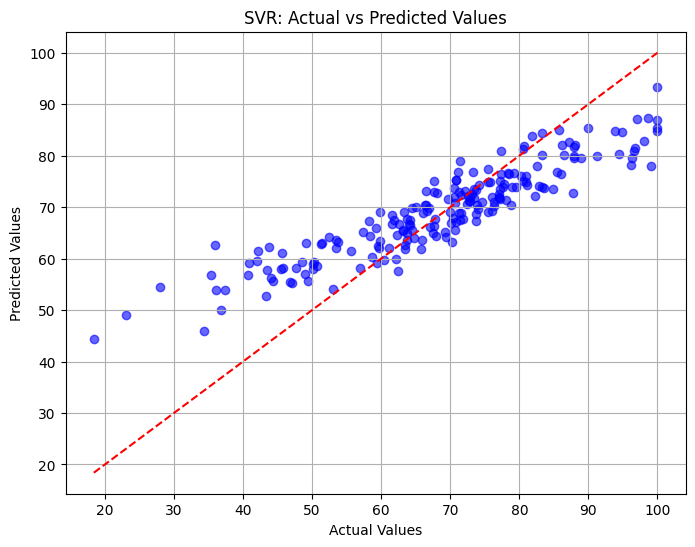

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR: Actual vs Predicted Values")
plt.grid(True)
plt.show()

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


knn_reg = KNeighborsRegressor(
    n_neighbors=10,
    weights='distance',
    algorithm='auto'    )
knn_reg.fit(X_train_scaled, y_train)


y_pred = knn_reg.predict(X_test_scaled)


print("KNN Regression Performance:")
print(f"- MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"- MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"- R²: {r2_score(y_test, y_pred):.4f}")


KNN Regression Performance:
- MSE: 109.0486
- MAE: 8.0706
- R²: 0.5747


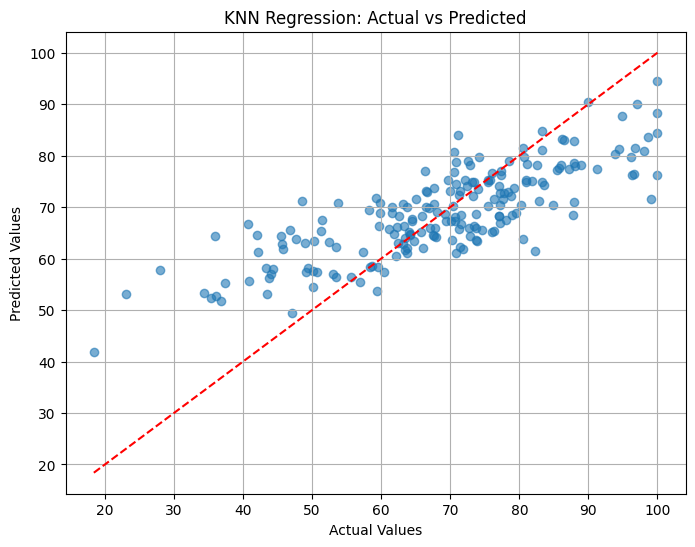

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression: Actual vs Predicted')
plt.grid(True)
plt.show()